In [1]:
import pandas as pd
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import HashingVectorizer
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC

In [2]:
df = pd.read_excel('CombinedData.xlsx')

In [3]:
df = df[:3000]

In [4]:
df.label.value_counts()

label
0.0    2267
1.0     733
Name: count, dtype: int64

In [5]:
df.shape

(3000, 2)

In [6]:
df = df.sample(frac = 1)

In [7]:
df.head()

,text,label
2330,"Yes, you know that BPR has passed, want to kno...",0.0
2167,Innalillahhh look for mutual just flop Â©,0.0
1435,joder yoongi te amo granny,0.0
2397,Can't wait to listen to the full imatero Gello...,0.0
2906,"Hyewon, what are you doing, what are you doing?",0.0


In [8]:
df.isnull().sum()

text     8
label    0
dtype: int64

In [9]:
df.dropna()

,text,label
2330,"Yes, you know that BPR has passed, want to kno...",0.0
2167,Innalillahhh look for mutual just flop Â©,0.0
1435,joder yoongi te amo granny,0.0
2397,Can't wait to listen to the full imatero Gello...,0.0
2906,"Hyewon, what are you doing, what are you doing?",0.0
...,...,...
1094,The freedom to choose has arrived. What are yo...,0.0
2533,but surely many are not as dom :(,0.0
1082,got info from surabaya village if there will b...,0.0
713,just-have you ever been let down by your best ...,1.0


In [10]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import spacy
lm = WordNetLemmatizer()

In [11]:
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /home/ankit/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /home/ankit/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /home/ankit/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [12]:
def text_transformation(col):
    corpus = []
    for token in col:
        alphabet = re.sub('[^a-zA-Z]',' ',str(token))
        alphabet = alphabet.lower()
        alphabet = alphabet.split()
        a_lemmas = [lm.lemmatize(word) for word in alphabet if word not in set(stopwords.words('english'))]
        corpus.append(' '.join(str(x) for x in a_lemmas))
    return corpus

In [13]:
df['cleaned'] = text_transformation(df.text)

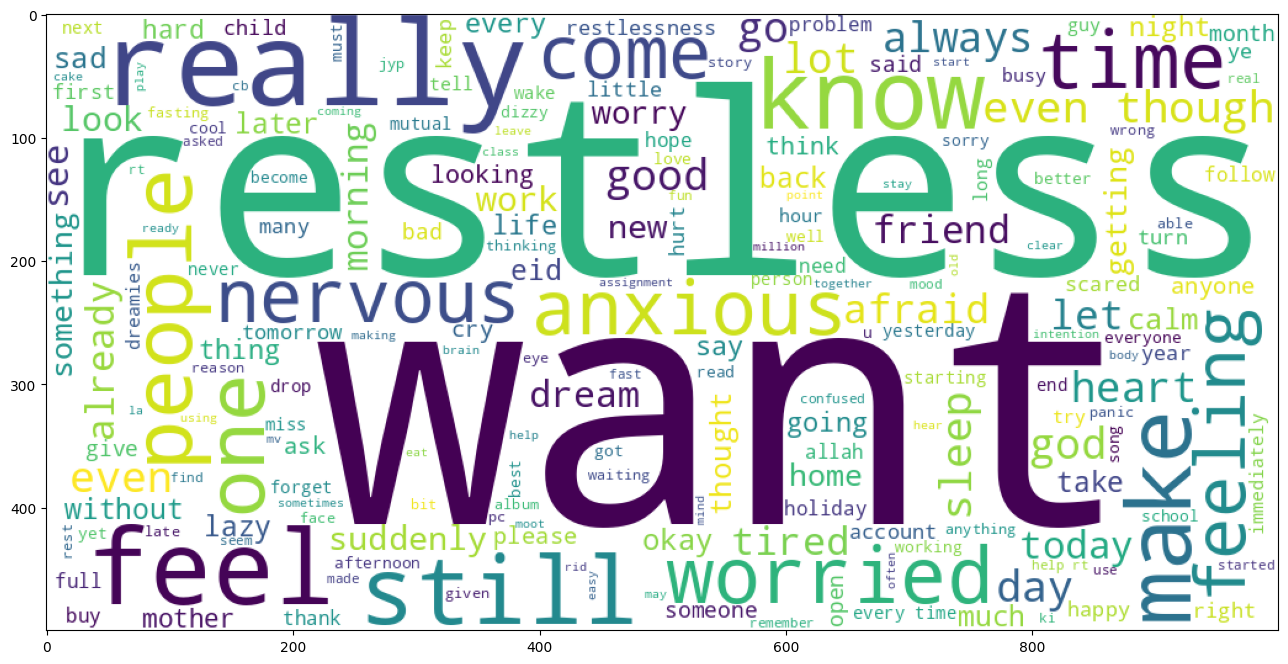

In [14]:
from wordcloud import WordCloud
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = 20,8
word_cloud = ""
for row in df['cleaned'].head(2000):
    for word in row:
        word_cloud+=" ".join(word)
wordcloud = WordCloud(width = 1000, height = 500,background_color ='white',min_font_size = 6).generate(word_cloud)
plt.imshow(wordcloud)

In [15]:
X = df.cleaned
y = df.label.astype(int)

In [16]:
vect = TfidfVectorizer(max_features = 20000 , lowercase=False , ngram_range=(1,2),use_idf = True)

In [17]:
X_tfidf =vect.fit_transform(X).toarray()

In [18]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_tfidf,y,stratify = y,test_size = 0.2,random_state = 1)

In [19]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier


lr_model = LogisticRegression(class_weight='balanced', max_iter=400)
dt_model = DecisionTreeClassifier(class_weight='balanced')
rf_model = RandomForestClassifier(class_weight='balanced')
mnb_model = MultinomialNB()
knn_model = KNeighborsClassifier()
model_names = ['Logistic Regression','Decision Tree','Random Forest','Naive Bayes', 'KNN']
ml_models = [lr_model,dt_model,rf_model,mnb_model, knn_model]

In [21]:
trained_ml_models = []
def model_train(model, train_data, train_labels):
    mf = model.fit(train_data,train_labels)
    trained_ml_models.append(mf)
# trained_ml_models = []
for i in ml_models:
    model_train(i,X_train, y_train)
#     trained_ml_models.append(tt)

In [22]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_auc_score

print(f"Number of trained models: {len(trained_ml_models)}")
print(f"Number of model names: {len(model_names)}")

pr_list = []
re_list = []
f1_list = []

def print_results(md, x_test, y_test, name):
    #print("\n\nClassifier: ", name)
    pred_y = md.predict(x_test)
    true, pred = y_test, pred_y

    pr_list.append((round(precision_score(y_test, pred_y, average='weighted'),4)*100)) 
    re_list.append((round(recall_score(y_test, pred_y, average='weighted'),4)*100))
    f1_list.append((round(f1_score(y_test, pred_y, average='weighted'),4)*100))

for i in range(len(trained_ml_models)):
    md = trained_ml_models[i]
    name = model_names[i]
    print_results(md, X_test, y_test, name)

performance_matrix = pd.DataFrame({'Precision':pr_list,
                                   'Recall':re_list,'F1 Score':f1_list},
                                  index =model_names)

Number of trained models: 5
Number of model names: 5


In [23]:
performance_matrix

,Precision,Recall,F1 Score
Logistic Regression,95.85,95.83,95.76
Decision Tree,96.15,96.17,96.15
Random Forest,96.01,96.00,95.93
Naive Bayes,87.72,85.33,82.85
KNN,82.67,77.50,69.41


In [24]:
data_matrix = pd.DataFrame({
    'Model':model_names,'Precision':pr_list,
                        'Recall':re_list,
                        'F1 Score':f1_list,
                      },
                    )

In [25]:
data_matrix

,Model,Precision,Recall,F1 Score
0,Logistic Regression,95.85,95.83,95.76
1,Decision Tree,96.15,96.17,96.15
2,Random Forest,96.01,96.00,95.93
3,Naive Bayes,87.72,85.33,82.85
4,KNN,82.67,77.50,69.41


/tmp/ipykernel_56953/3163055031.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.xaxis.set_ticklabels(model_names, rotation=45)


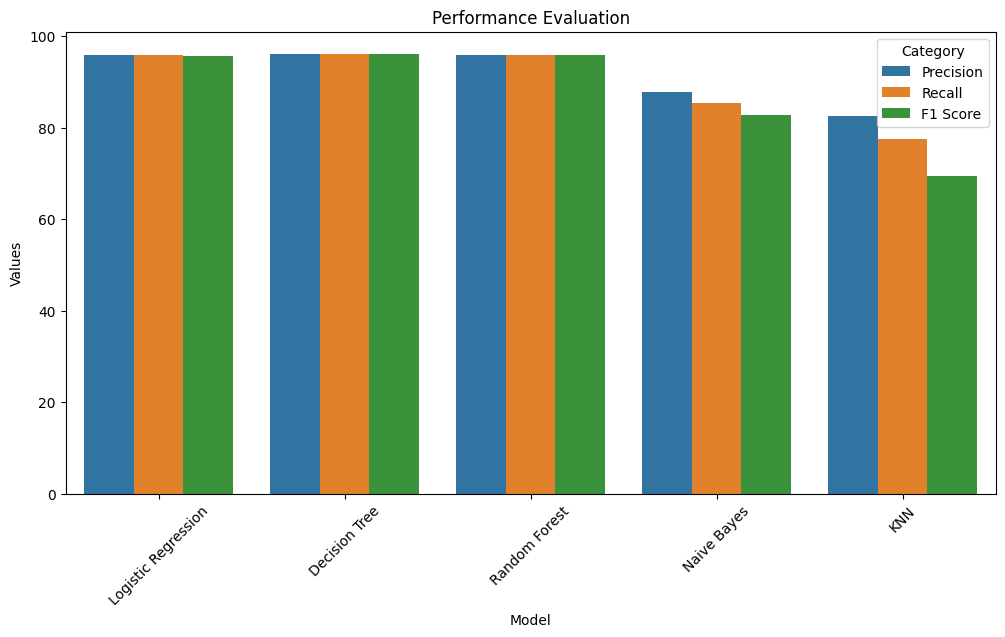

In [26]:
df_1 = pd.melt(data_matrix, id_vars="Model", var_name="Category", value_name="Values")
plt.figure(figsize=(12, 6))
ax = plt.subplot()

sns.barplot(data=df_1,x='Model', y='Values' ,hue='Category')
ax.set_xlabel('Model') 
ax.set_title('Performance Evaluation')

ax.xaxis.set_ticklabels(model_names, rotation=45)
plt.show()